In [2]:
import numpy as np
from scipy import signal
import matplotlib.pylab as plt


We want to investigate the relationship between the poles of a second order system, the damping ratio and natural frequency, and the various performance specifications. 

Consider the general second order response for the transfer function:

\begin{align}
    G(s) = \frac{b}{s^2 + a s +b} = \frac{\omega_n^2}{s^2 + 2 \zeta \omega_n s + \omega_n^2}
\end{align}

subject to the the unit step input:

\begin{align}
    R(s) = \frac{1}{s}
\end{align}

## Overdamped Response

Two real poles in the left half plane

$$
G(s) = \frac{9}{s^2 + 9s + 9}
$$

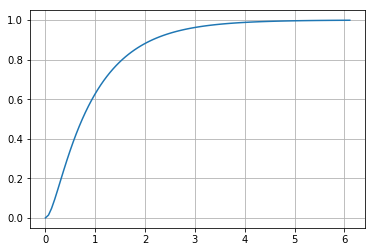

In [3]:
G1 = signal.TransferFunction([9], [1, 9, 9])
time, resp1 = signal.step(G1)

fig, ax = plt.subplots()
ax.plot(time, resp1)
ax.grid()
plt.show()

## Underdamped Response

Two complex poles in the left half plane

$$
G(s) = \frac{9}{s^2 + 2s + 9}
$$

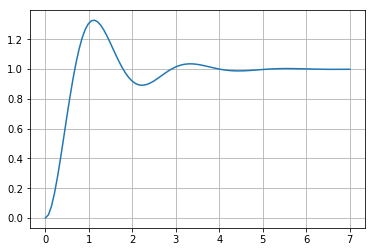

In [4]:
G2 = signal.TransferFunction([9], [1, 2, 9])
time, resp2 = signal.step(G2)

fig, ax = plt.subplots()
ax.plot(time, resp2)
ax.grid()
plt.show()

## Undamped Response

Two imaginary poles on the imaginary axis

$$
G(s) = \frac{9}{s^2 + 9}
$$

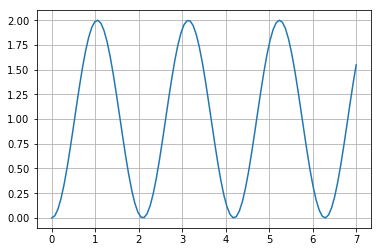

In [5]:
G3 = signal.TransferFunction([9], [1, 0, 9])
time, resp3 = signal.step(G3)

fig, ax = plt.subplots()
ax.plot(time, resp3)
ax.grid()
plt.show()

## Critically Damped Response

Two repeated poles on the real axis

$$
G(s) = \frac{9}{(s +3)^2}
$$

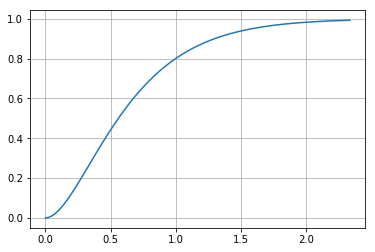

In [6]:
G4 = signal.TransferFunction([9], [1, 6, 9])
time, resp4 = signal.step(G4)

fig, ax = plt.subplots()
ax.plot(time, resp4)
ax.grid()
plt.show()

## All basic second order responses

Now we'll plot everything on a single plot

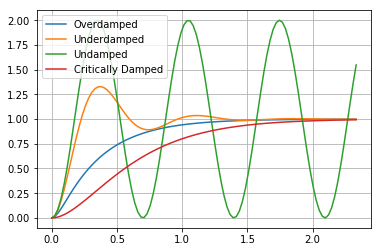

In [7]:
fig, ax = plt.subplots()
ax.plot(time, resp1, label='Overdamped')
ax.plot(time, resp2, label='Underdamped')
ax.plot(time, resp3, label='Undamped')
ax.plot(time, resp4, label='Critically Damped')
ax.grid()
ax.legend()
plt.show()

## Effect of $\zeta$

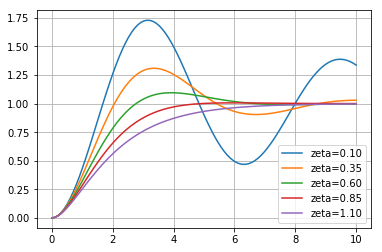

In [16]:
# plot many responses for varying zeta
time = np.linspace(0, 10, 100)
u = np.ones_like(time)
wn = 1
zeta = np.linspace(0.1, 1.1, 5)
fig, ax = plt.subplots()

for z in zeta:
    num = [wn**2]
    den = [1, 2*z*wn, wn**2]
    tout, resp, x = signal.lsim((num, den), u, time)
    ax.plot(tout, resp, label='zeta={:.2f}'.format(z))

ax.grid()
ax.legend()
plt.show()

## Effect of $\omega_n$

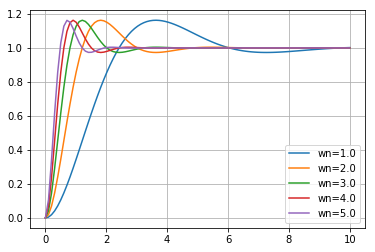

In [15]:
# plot many responses for varying zeta
time = np.linspace(0, 10, 100)
u = np.ones_like(time)
wn = np.linspace(1, 5, 5)
zeta = 0.5
fig, ax = plt.subplots()

for w in wn:
    num = [w**2]
    den = [1, 2*zeta*w, w**2]
    tout, resp, x = signal.lsim((num, den), u, time)
    ax.plot(tout, resp, label='wn={}'.format(w))

ax.grid()
ax.legend()
plt.show()